## Домашняя работа

Поработаем с датасетом о [пользователях кредитных карт](https://www.kaggle.com/arjunbhasin2013/ccdata). 

Данные лежат в `data/credit_card.csv`. 

### Easy

Нужно посмотреть, по каким переменным имеет смысл объединять пользователей в группы (например, используя `sns.pairplot`). Можно взять все признаки. Провести кластеризацию, подобрав количество кластеров "на глаз".

### Normal

Определить количество кластеров при помощи метода Elbow.

Вывести график с разделением на группы в координатах `BALANCE`-`PURCHASES` и `BALANCE`-`PURCHASER_INSTALLMENTS_FREQUENCY`. Видны ли какие-то закономерности?

### Hard

Посмотреть зависимости между другими признаками и попробовать проинтерпретировать какие-то кластеры.

## Easy


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns

In [2]:
df = pd.read_csv('data/credit_card.csv')
df = df.dropna()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


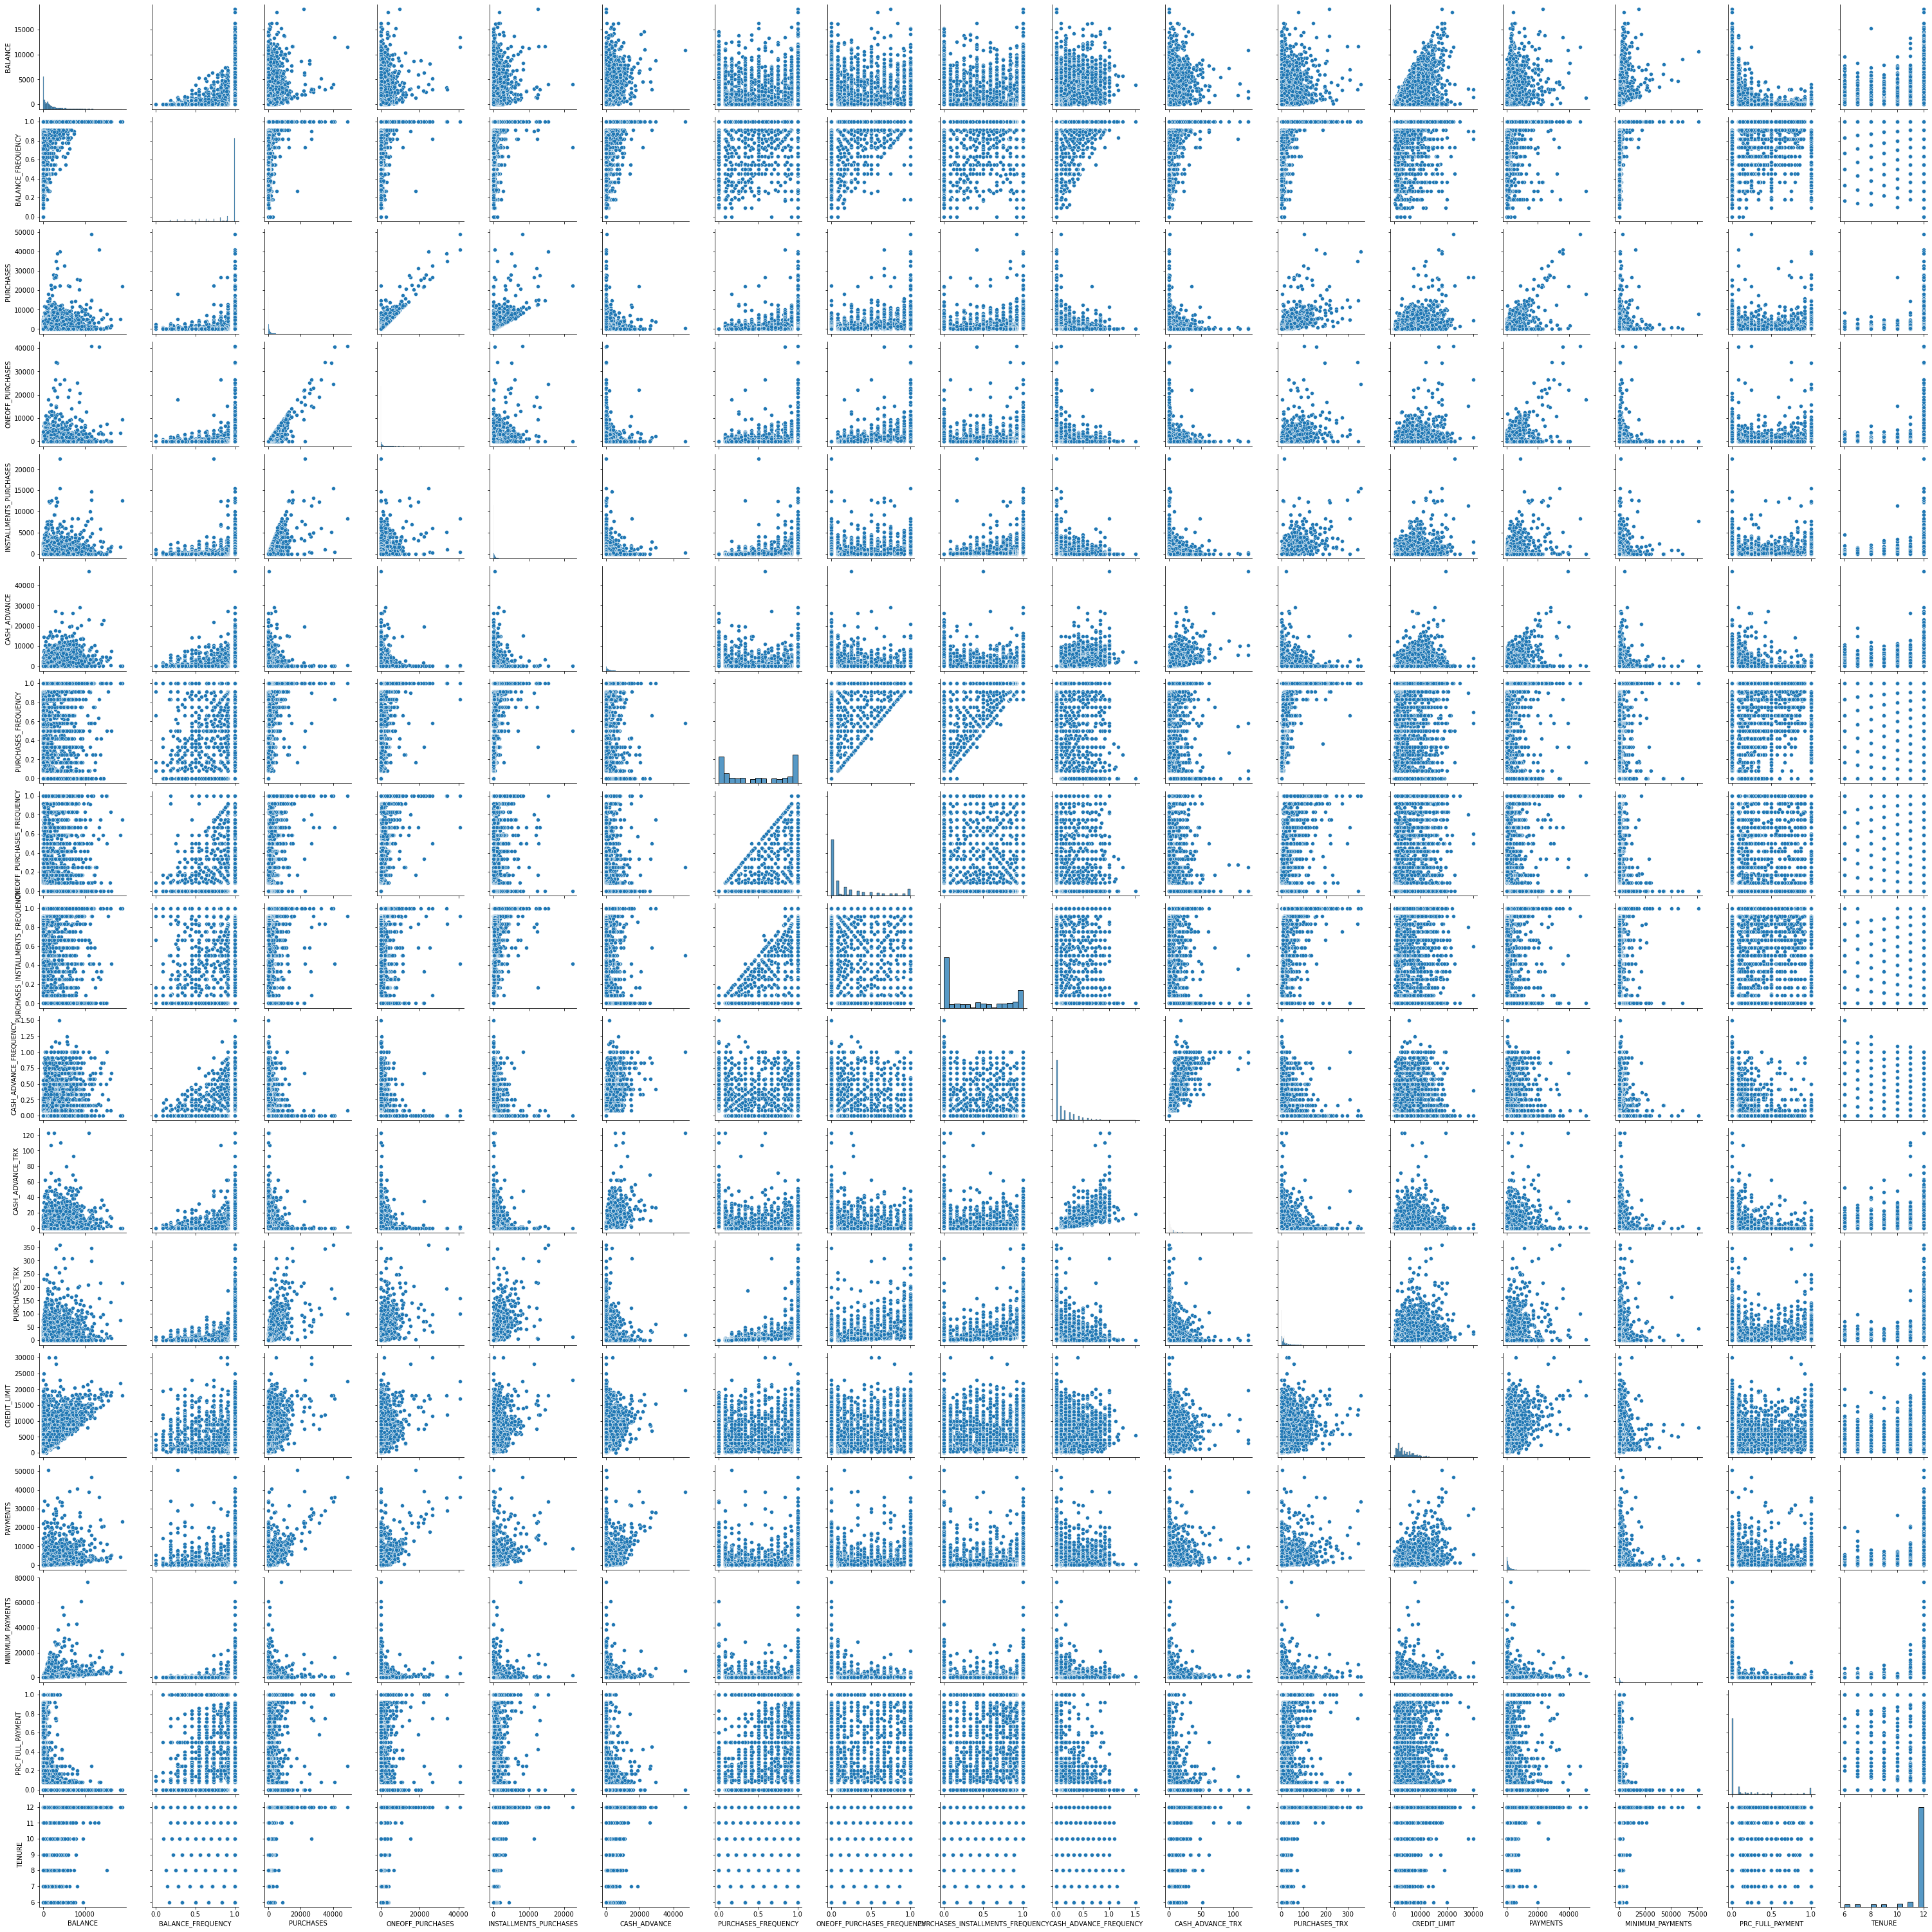

In [3]:
sns.pairplot(df)  

In [4]:
df = df[['BALANCE', 'PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY']]

In [5]:
model = KMeans(2)
labels = model.fit_predict(df.values)

In [6]:
df['cluster'] = labels

<ipython-input-6-155048fe00fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


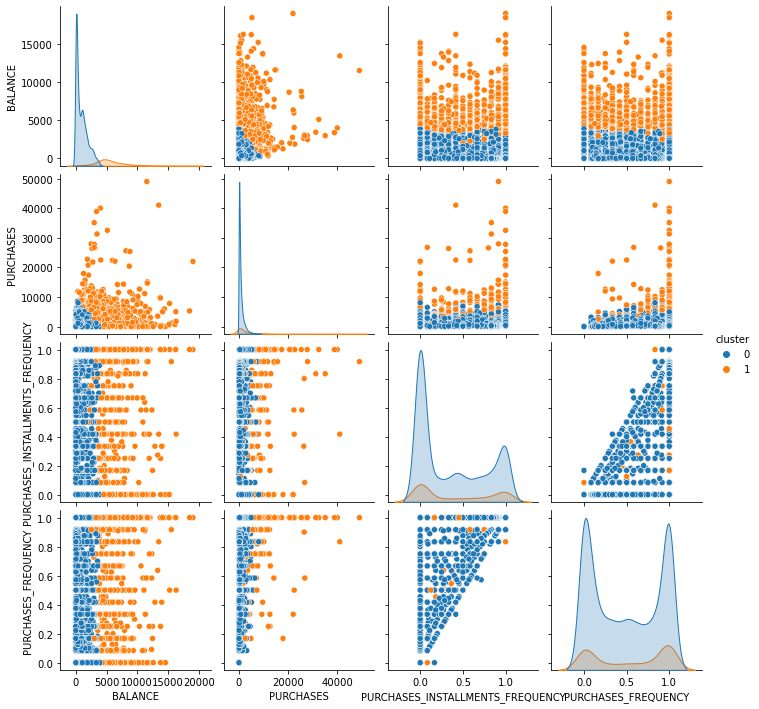

In [7]:
sns.pairplot(df[['BALANCE', 'PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY', 'cluster']], hue = 'cluster')

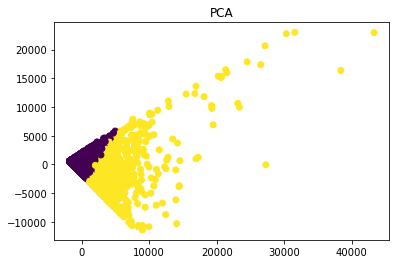

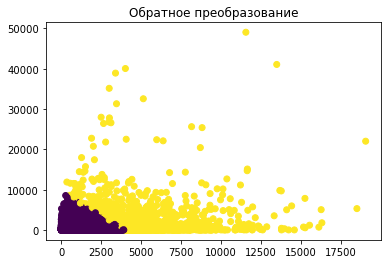

In [8]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_result = pca.fit_transform(df.values)
model_labels = model.fit_predict(df.values)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=model_labels)
plt.title('PCA')
inverse = pca.inverse_transform(pca_result)

plt.figure()
plt.title('Обратное преобразование')
model_labels = model.fit_predict(df.values)
plt.scatter(inverse[:, 0], inverse[:, 1], c=model_labels)

## Normal. 
Определить количество кластеров при помощи метода Elbow.

Вывести график с разделением на группы в координатах BALANCE-PURCHASES и BALANCE-PURCHASER_INSTALLMENTS_FREQUENCY. Видны ли какие-то закономерности?

Ответ: Применим Elbow method

In [9]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

Text(0.5, 1.0, 'Elbow method')

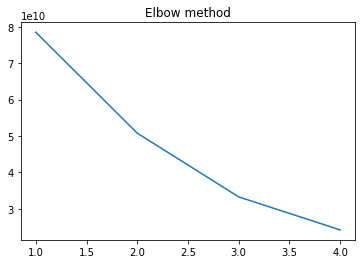

In [10]:
distances = [distance_by_n(df.values, n) for n in range(1, 5)]
plt.plot(range(1, 5), distances)
plt.title('Elbow method')

Количество групп (кластеров) = 2 - 3 (больше склоняюсь к 2ум)

*Дополнительно (см. в конце ноутбука) построена дендрограмма - по ней также выходит 2 класса! (см. ниже)

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

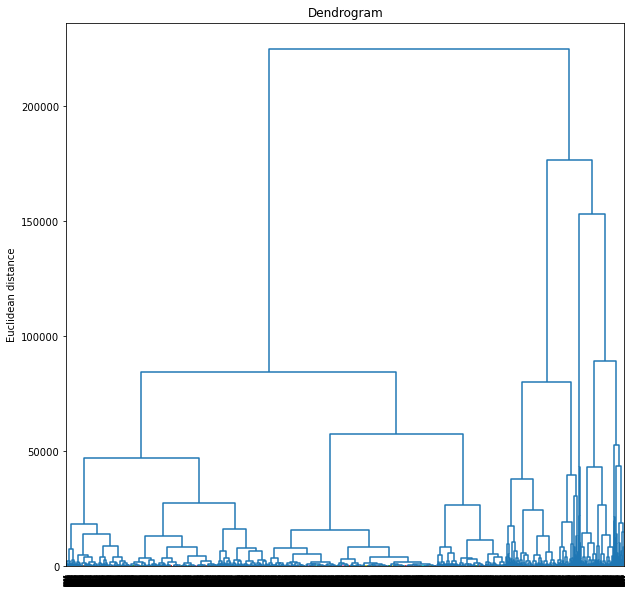

In [12]:

Z = linkage(df.values, method = 'ward')

plt.figure(figsize =(10, 10))
dendro = dendrogram(Z, color_threshold = 100)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Вывод - количество основных класссов (кластеров) = 2

Для DBSCAN()

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
df_std = (df - df.mean()) / df.std()

In [15]:
labels = DBSCAN(2,  min_samples = 10).fit_predict(df_std)

In [16]:
df_std['cluster'] = labels

In [17]:
df = df_std[['BALANCE', 'PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY', 'cluster']]

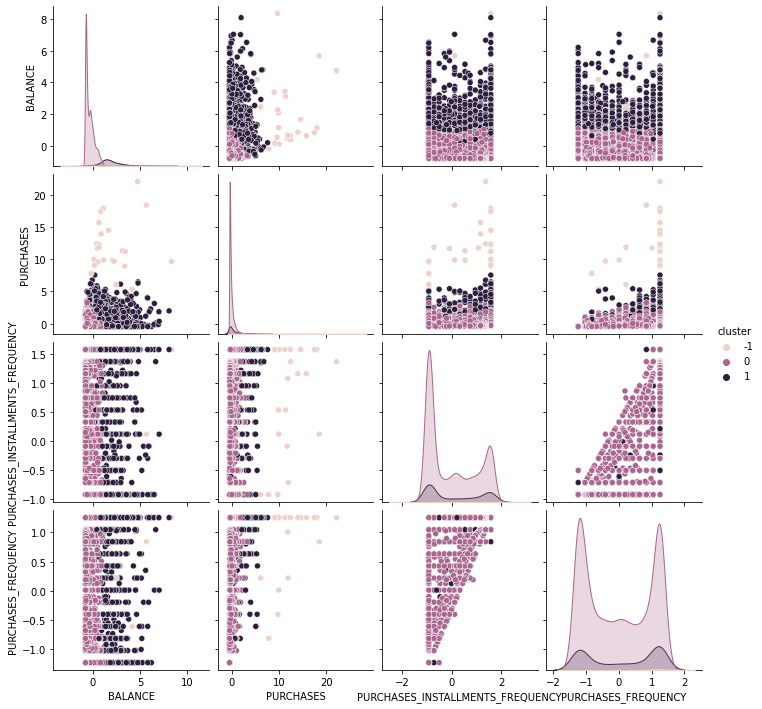

In [18]:
sns.pairplot(df, hue = 'cluster')

График в координатах ['BALANCE', 'PURCHASES'] с разделением на группы выглядит так:

In [23]:
dfv = df[['BALANCE','PURCHASES']]

<ipython-input-25-446f2552e2bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv['cluster'] = labels


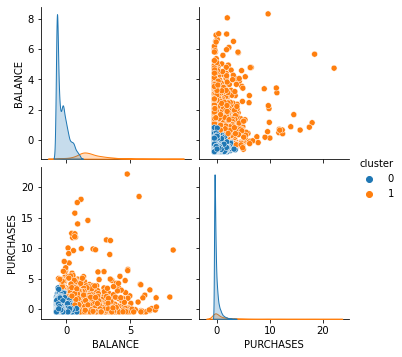

In [25]:
model_dfv = KMeans(2)
labels = model_dfv.fit_predict(dfv.values)
dfv['cluster'] = labels
sns.pairplot(dfv, hue='cluster')


График в координатах ['BALANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY'] выглядит так:

<ipython-input-26-11c4d4a6286f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv2['cluster'] = labels


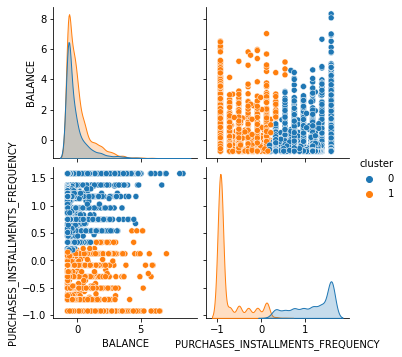

In [26]:
dfv2 = df[['BALANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY']]
model_dfv2 = KMeans(2)
labels = model_dfv2.fit_predict(dfv2.values)
dfv2['cluster'] = labels
sns.pairplot(dfv2, hue='cluster')

По поводу закономерностей: на основании рассмотренных графиков можно сказать, что те, у кого небольшой баланс, совершают небольшое количество покупок.
Людям с большим балансом не свойственно совершение больших покупок.
У большинства людей баланс небольшой.
Также видно, что лица с небольшим балансом чаще осуществляют покупки в рассрочку.